In [12]:
# データ加工
import numpy as np
import pandas as pd

# 可視化
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors
import matplotlib.dates as mdates

# その他
import datetime
import openpyxl
import warnings
import os
import glob
import fitz

In [3]:
da=pd.read_excel(r"C:\Users\user\Desktop\05_グライディングセンタ\910のみtimedata改.xlsx")
da=da[['LotNo','FLAG','開始時間','終了時間','No']]
da['No'] = da['No'].astype(str)
da["ナンバリング"]=da['LotNo']+"-"+da['No']
pd.set_option('display.max_rows', None)#作成したデータフレーム結果をすべて表示する#以降すべてに反映されるので注意！
pd.set_option('display.max_columns', None)#作成したデータフレーム結果をすべて表示する#以降すべてに反映されるので注意！
da


##ドレッシング1,2抜き出し
d=pd.DataFrame()
for root, dirs, files in os.walk(r"C:\Users\user\Desktop\05_グライディングセンタ\time_data"):
    for f in files:
# 指定したフォルダ内のファイル情報をすべて取得
        full = os.path.join(root, f)
        di=pd.read_csv(full,encoding="cp932")
        d=pd.concat([d,di], axis=0, ignore_index=True)
dF1=d.loc[d["FLAG"] == 1]
dF2=d.loc[d["FLAG"] == 2]
d=pd.concat([dF1,dF2], axis=0, ignore_index=True)

# 時間をdatatime型に変換
d["開始時間"] = pd.to_datetime(d["開始時間"])
d["終了時間"] = pd.to_datetime(d["終了時間"])

# 各データのデータ型を確認する。
# d.dtypes.to_frame().rename(columns={0:'Column type'})

#FLAG=0と結合
data=pd.concat([da,d],axis=0)

#ソート
data = data.sort_values(by=["開始時間"], ascending=True)

#ドレ前
dre_mae = data.loc[(data["FLAG"].shift(-1)==1)&(data["FLAG"]==0),:]
dre_mae['前/後'] = '前'

#ドレ後
dre_ato = data.loc[(data["FLAG"].shift(2)==2)&(data["FLAG"]==0)&(data["FLAG"].shift(1) != 2),:]
dre_ato['前/後'] = '後'

#ドレくっつけてソート
dre=pd.concat([dre_mae,dre_ato])
dre["開始時間"]=pd.to_datetime(dre["開始時間"])
dre["終了時間"]=pd.to_datetime(dre["終了時間"])
dre.sort_values(by ="開始時間", ascending = True, inplace = True)
dre.reset_index(inplace=True, drop=True)
dre

C:\Users\user\AppData\Local\Temp\ipykernel_14064\195945839.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dre_mae['前/後'] = '前'
C:\Users\user\AppData\Local\Temp\ipykernel_14064\195945839.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dre_ato['前/後'] = '後'


,LotNo,FLAG,開始時間,終了時間,No,ナンバリング,前/後
0,2217179-000,0,2022-11-09 10:31:00,2022-11-09 10:41:00,2,2217179-000-2,後
1,2217179-000,0,2022-11-09 16:26:00,2022-11-09 16:37:00,14,2217179-000-14,前
2,2217179-000,0,2022-11-09 18:01:00,2022-11-09 18:11:00,16,2217179-000-16,後
3,2217179-000,0,2022-11-09 22:16:00,2022-11-09 22:27:00,27,2217179-000-27,前
4,2217179-000,0,2022-11-10 07:47:00,2022-11-10 07:57:00,29,2217179-000-29,後
5,2217179-000,0,2022-11-10 08:08:00,2022-11-10 08:18:00,30,2217179-000-30,前
6,2218571-000,0,2022-11-21 21:48:00,2022-11-21 21:58:00,2,2218571-000-2,後
7,2218571-000,0,2022-11-22 00:21:00,2022-11-22 00:32:00,9,2218571-000-9,前
8,2218571-000,0,2022-11-22 07:42:00,2022-11-22 07:53:00,11,2218571-000-11,後
9,2218571-000,0,2022-11-22 14:57:00,2022-11-22 15:08:00,30,2218571-000-30,前


In [4]:
d0=pd.DataFrame()
for root, dirs, files in os.walk(r"C:\Users\user\Desktop\05_グライディングセンタ\eq_data\2218571-000"):
    for f in files:
        # 指定したフォルダ内のファイル情報をすべて取得
        full = os.path.join(root, f)
        
        # ファイルの最終更新日時を取得
        p = full
        t = os.path.getmtime(p)
        D = datetime.datetime.fromtimestamp(t).strftime('%Y/%m/%d %H:%M:%S.%f')[:-3]#最終更新日時をタイムスタンプ型に変換
        
        # ファイル読み込み、整形
        dx=pd.read_csv(full, skiprows=2,encoding="cp932")
        dx = dx.rename(columns={'Time': 'Time(msec)', 'POSF': 'POSF(mm)','POSF.1': 'POSF.1(mm)','TCMD':'TCMD(%)','TCMD.1':'TCMD.1(%)','TCMD.2':'TCMD.2(%)','TCMD.3':'TCMD.3(%)','TCMD.4':'TCMD.4(%)','SPEED':'SPEED(1/min)'})
        dx=dx.dropna()
        dx["latest_time"]=D
        dx["latest_time"]=pd.to_datetime(dx["latest_time"])#最終更新日時をdatetime型に変換
        dx['Time(msec)'] = dx['Time(msec)'].astype(float).astype(int)
        dx['Time(msec)']=dx['Time(msec)']/1000
        dx['lt_unix']=dx.latest_time.apply(lambda t: int(t.timestamp()))
        dx['lt_unix2']=dx['lt_unix']-299.995
        dx['lt_unix3']=(dx['lt_unix2']+dx['Time(msec)']).astype(int)
        dx['lt']=pd.to_datetime(dx['lt_unix3'], unit='s')
        # 縦結合
        d0=pd.concat([d0,dx], axis=0, ignore_index=True)

d = d0[['lt','Time(msec)','POSF(mm)','POSF.1(mm)','TCMD(%)','TCMD.1(%)','TCMD.2(%)','TCMD.3(%)','TCMD.4(%)','SPEED(1/min)']]
print(d.shape)
d.head()

(2520000, 10)


,lt,Time(msec),POSF(mm),POSF.1(mm),TCMD(%),TCMD.1(%),TCMD.2(%),TCMD.3(%),TCMD.4(%),SPEED(1/min)
0,2022-11-21 21:43:08,0.000,-75414.686000000002000,-1810.777500000000100,-0.247184839329854,-0.494369678659709,0.604229607250755,-8.802526778357594,4.820556640625000,3500.199999999999800
1,2022-11-21 21:43:08,0.005,-75414.686000000002000,-1810.777100000000000,-0.508102169733590,-0.411974732216424,0.549299642955232,-9.145839055204615,5.223388671875000,3499.200000000000300
2,2022-11-21 21:43:08,0.010,-75414.686000000002000,-1810.777000000000000,-0.096127437517166,-0.535567151881351,0.563032134029113,-7.841252403185938,5.601806640625000,3499.000000000000000
3,2022-11-21 21:43:08,0.015,-75414.688999999998000,-1810.777200000000000,-0.178522383960450,-0.563032134029113,0.604229607250755,-8.033507278220268,5.378417968750000,3499.799999999999700
4,2022-11-21 21:43:08,0.020,-75414.687999999995000,-1810.777300000000200,-0.398242241142543,-0.769019500137325,0.508102169733590,-8.912386706948640,5.460205078125000,3498.400000000000100


In [5]:
#　eq_dataのデータ加工
warnings.simplefilter('ignore', FutureWarning)

df = d

#カラムの要素の変更
df['TCMD(%)'] = df['TCMD(%)'].astype(float)
df['TCMD.1(%)'] = df['TCMD.1(%)'].astype(float)
df['TCMD.2(%)'] = df['TCMD.2(%)'].astype(float)
df['TCMD.3(%)'] = df['TCMD.3(%)'].astype(float)
df['TCMD.4(%)'] = df['TCMD.4(%)'].astype(float)
df['SPEED(1/min)'] = df['SPEED(1/min)'].astype(float)


#カラム名を変更
df = df.rename(columns={'TCMD(%)': 'X軸_TCMD(%)', 'TCMD.1(%)': 'Z軸_TCMD(%)','TCMD.2(%)':'B軸_TCMD(%)','TCMD.3(%)':'C軸_TCMD(%)','TCMD.4(%)':'スピンドル_TCMD(%)'})

#カラムの削除
df = df.drop(['Time(msec)','POSF(mm)','POSF.1(mm)'],axis=1)

print(df.info())
print(df.shape)
df.describe().astype(int)

C:\Users\user\AppData\Local\Temp\ipykernel_14064\3039954910.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TCMD(%)'] = df['TCMD(%)'].astype(float)
C:\Users\user\AppData\Local\Temp\ipykernel_14064\3039954910.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TCMD.1(%)'] = df['TCMD.1(%)'].astype(float)
C:\Users\user\AppData\Local\Temp\ipykernel_14064\3039954910.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2520000 entries, 0 to 2519999
Data columns (total 7 columns):
 #   Column         Dtype         
---  ------         -----         
 0   lt             datetime64[ns]
 1   X軸_TCMD(%)     float64       
 2   Z軸_TCMD(%)     float64       
 3   B軸_TCMD(%)     float64       
 4   C軸_TCMD(%)     float64       
 5   スピンドル_TCMD(%)  float64       
 6   SPEED(1/min)   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 134.6 MB
None
(2520000, 7)


,X軸_TCMD(%),Z軸_TCMD(%),B軸_TCMD(%),C軸_TCMD(%),スピンドル_TCMD(%),SPEED(1/min)
count,2520000,2520000,2520000,2520000,2520000,2520000
mean,0,-1,0,-5,2,1883
std,1,1,0,4,7,1687
min,-56,-37,-43,-14,-100,-62
25%,0,-2,0,-9,0,0
50%,0,-1,0,-3,4,3497
75%,0,0,0,-1,5,3499
max,56,30,25,25,100,3502


2217179-000-2 2022-11-09 10:31:00 2022-11-09 10:41:00
2217179-000-14 2022-11-09 16:26:00 2022-11-09 16:37:00
2217179-000-16 2022-11-09 18:01:00 2022-11-09 18:11:00
2217179-000-27 2022-11-09 22:16:00 2022-11-09 22:27:00
2217179-000-29 2022-11-10 07:47:00 2022-11-10 07:57:00
2217179-000-30 2022-11-10 08:08:00 2022-11-10 08:18:00
2218571-000-2 2022-11-21 21:48:00 2022-11-21 21:58:00
2218571-000-9 2022-11-22 00:21:00 2022-11-22 00:32:00
2218571-000-11 2022-11-22 07:42:00 2022-11-22 07:53:00
2218571-000-30 2022-11-22 14:57:00 2022-11-22 15:08:00
2218571-000-32 2022-11-22 17:04:00 2022-11-22 17:15:00
2218571-000-43 2022-11-22 21:57:00 2022-11-22 22:08:00
2218571-000-Null 2022-11-24 13:39:00 2022-11-24 13:50:00
2218571-000-Null 2022-11-24 21:18:00 2022-11-24 21:29:00
2218571-000-76 2022-11-25 06:59:00 2022-11-25 07:09:00
2218571-000-77 2022-11-25 07:25:00 2022-11-25 07:36:00
2218571-000-79 2022-11-25 08:40:00 2022-11-25 08:51:00
2218571-000-80 2022-11-25 08:59:00 2022-11-25 09:10:00
2218571-0

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 36600 (\N{CJK UNIFIED IDEOGRAPH-8EF8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25512 (\N{CJK UNIFIED IDEOGRAPH-63A8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 31227 (\N{CJK UNIFIED IDEOGRAPH-79FB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


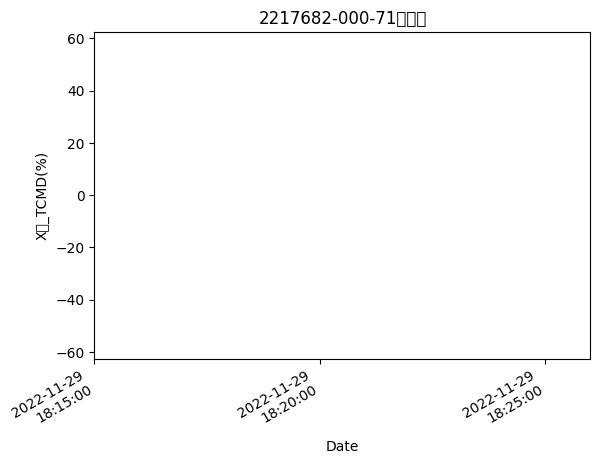

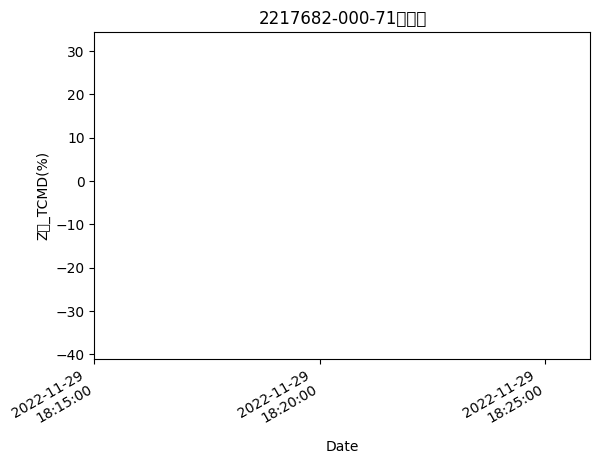

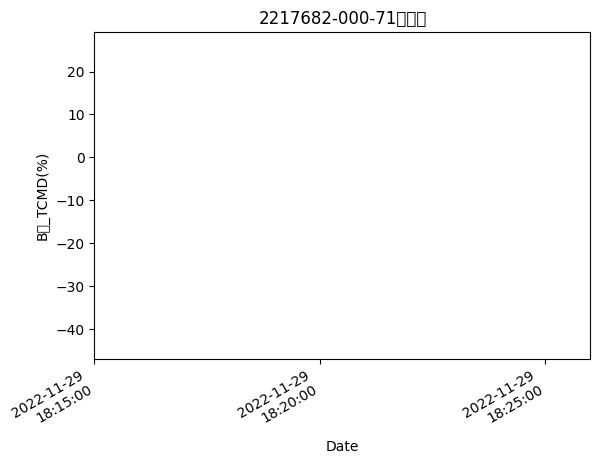

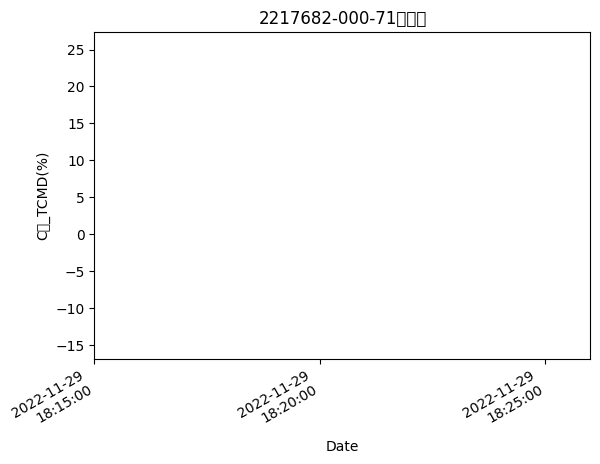

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12473 (\N{KATAKANA LETTER SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12500 (\N{KATAKANA LETTER PI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12531 (\N{KATAKANA LETTER N}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12489 (\N{KATAKANA LETTER DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarnin

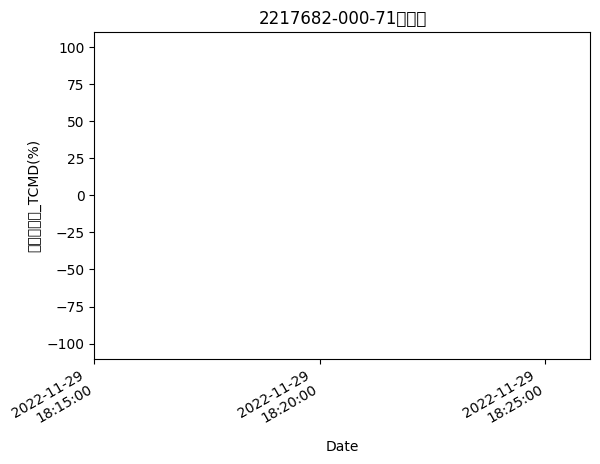

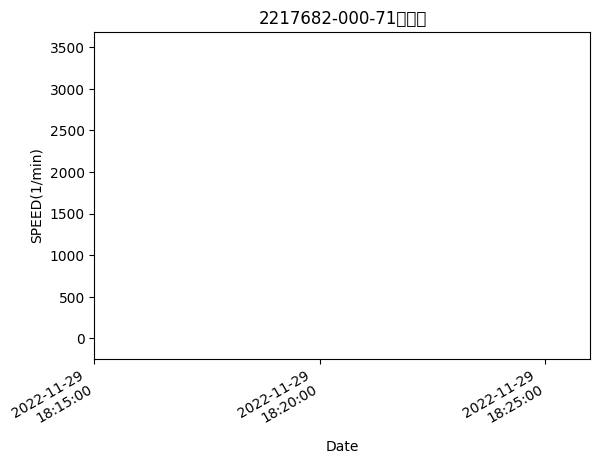

In [13]:
#リスト化
s = dre['開始時間'].tolist()
g = dre['終了時間'].tolist()
lots = dre['ナンバリング'].tolist()
a = df[['X軸_TCMD(%)','Z軸_TCMD(%)','B軸_TCMD(%)','C軸_TCMD(%)','スピンドル_TCMD(%)','SPEED(1/min)']]# # # x軸の範囲設定
for st,gt,lot in zip(s,g,lots):
    xmin = st
    xmax = gt
    print(lot,xmin,xmax)
#グラフ作成
for yy in a:
    df_graph = a
    plt.scatter(x = df['lt'], y = df_graph[yy],s=200)
    plt.xlim([xmin,xmax])
    # plt.ylim([-10,10])
    plt.gcf().autofmt_xdate(rotation=30)
    myFmt = mdates.DateFormatter("%Y-%m-%d\n%H:%M:%S")
    plt.gca().xaxis.set_major_formatter(myFmt)
    # plt.xticks( np.arange(xmin,xmax,))
    plt.title(lot + 'の推移')
    plt.xlabel('Date')
    plt.ylabel(yy)
    # if yy == "TX軸_TCMD(%)":
    #     plt.ylim(-56,59)
    # elif yy == "Z軸_TCMD(%)":
    #     plt.ylim(-37,30)
    # elif yy == "B軸_TCMD(%)":
    #     plt.ylim(-43,25)
    # elif yy == "C軸_TCMD(%)":
    #     plt.ylim(-14,25)
    # elif yy == "スピンドル_TCMD(%)":
    #     plt.ylim(-100,100)
    plt.show()